In [1]:
import ctypes
import os
import time
libCycleTime = ctypes.CDLL("./cycletimelib/libCycleTime.so")

In [3]:
# test things work
libCycleTime.init_counters(1,1)
time.sleep(0.01)
libCycleTime.get_cyclecount()

145233

In [4]:
libCycleTime.init_counters(1,1)
before_c = libCycleTime.get_cyclecount()
before_t = time.time()
os.system(f"taskset -c 1 python3 fib.py 20")
after_t = time.time()
after_c = libCycleTime.get_cyclecount()

print(f"python time: {after_t-before_t}")
print(f"cycle count: {after_c-before_c}")


time spent: 0.03583359718322754
python time: 0.33699631690979004
cycle count: 357197


In [5]:
def trial(fib_cnt:int):
    libCycleTime.init_counters(1,1)
    before_c = libCycleTime.get_cyclecount()
    before_t = time.time()
    os.system(f"taskset -c 1 python3 fib.py {fib_cnt}")
    after_t = time.time()
    after_c = libCycleTime.get_cyclecount()
    return (after_t-before_t, after_c-before_c)
trial(20)

time spent: 0.03591418266296387


(0.33927083015441895, 430119)

In [8]:
for i in range(3):
    print(f"terms: {(i+1)*10}:")
    for j in range(10):
        os.system(f"taskset -c 1 python3 fib2.py {(i+1)*10}")
        

terms: 10:
python time: 0.00033283233642578125, cycle count: 4396
python time: 0.00034809112548828125, cycle count: 4561
python time: 0.00032901763916015625, cycle count: 4357
python time: 0.0003275871276855469, cycle count: 4359
python time: 0.0003597736358642578, cycle count: 4694
python time: 0.0003540515899658203, cycle count: 4638
python time: 0.00032830238342285156, cycle count: 4352
python time: 0.0003418922424316406, cycle count: 4540
python time: 0.0003399848937988281, cycle count: 4474
python time: 0.0003342628479003906, cycle count: 4411
terms: 20:
python time: 0.035527944564819336, cycle count: 361794
python time: 0.03541851043701172, cycle count: 360783
python time: 0.035428762435913086, cycle count: 360908
python time: 0.03541088104248047, cycle count: 360722
python time: 0.03546547889709473, cycle count: 361301
python time: 0.035422563552856445, cycle count: 360818
python time: 0.03566384315490723, cycle count: 363331
python time: 0.03543424606323242, cycle count: 360963

In [13]:
for i in range(3):
    for j in range(10):
        os.system(f"taskset -c 1 python3 fib2.py {(i+1)*10} >> results.txt")

[0.00033314228057861327, 0.03552734851837158, 4.436621737480164]
[0.0004330043076923077, 0.035635692307692306, 4.436715382153846]
[3.345052221615217e-06, 8.662656358957566e-05, 0.002534104384086547]
[3.3809923483642416e-06, 8.835282904712847e-05, 0.002524253867541545]


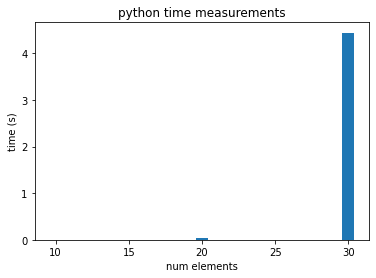

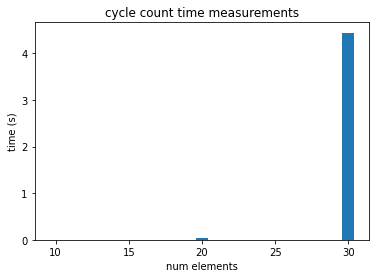

In [31]:
import matplotlib.pyplot as plt
import statistics
from math import sqrt

with open("results.txt", "r") as f:
    lines = f.readlines()

python_times = []
cycles_count = []
for i in range(30):
    if i%10==0:
        python_times.append([])
        cycles_count.append([])
    line = lines[i]
    _, _, py_time, _, _, cyc_cnt = line.strip().split()
    py_time = float(py_time.replace(',', ''))
    cyc_cnt = int(cyc_cnt)/(650000000/64)
    python_times[-1].append(py_time)
    cycles_count[-1].append(cyc_cnt)
# print(python_times)
# print(cycles_count)
py_mean = [statistics.mean(t) for t in python_times]
cy_mean = [statistics.mean(t) for t in cycles_count]
py_sem = [statistics.stdev(t)/sqrt(len(t)) for t in python_times]
cy_sem = [statistics.stdev(t)/sqrt(len(t)) for t in cycles_count]
print(py_mean)
print(cy_mean)
print(py_sem)
print(cy_sem)

plt.bar([10, 20, 30], cy_mean, yerr=cy_sem)
plt.xlabel("num elements")
plt.ylabel("time (s)")
plt.title("python time measurements")
plt.show()
plt.bar([10, 20, 30], py_mean, yerr=py_sem)
plt.xlabel("num elements")
plt.ylabel("time (s)")
plt.title("cycle count time measurements")
plt.show()

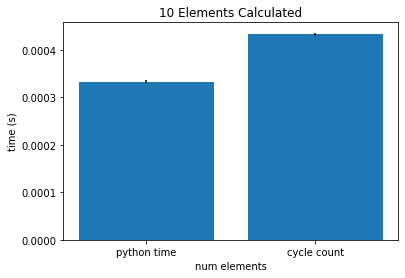

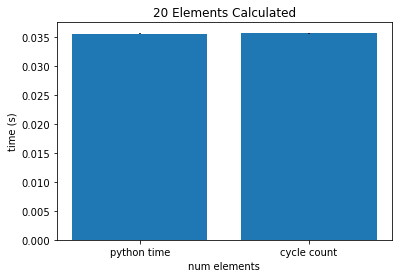

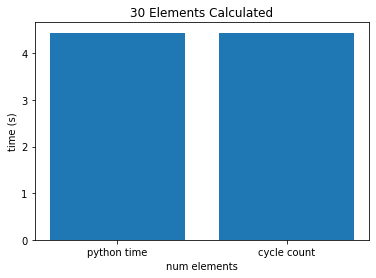

In [32]:
# this is easier to read
for i in range(3):
    plt.bar(["python time", "cycle count"], [py_mean[i], cy_mean[i]], yerr=[py_sem[i], cy_sem[i]])
    plt.xlabel("num elements")
    plt.ylabel("time (s)")
    plt.title(f"{(i+1)*10} Elements Calculated")
    plt.show()